# 팔각형 액추에이터- 패턴개수: 1개~10개 (1패턴: 1층: 링과 링사이)

In [96]:
import pandas as pd    ##제목이랑 그래프 타이틀 붙이기
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# -50kPa하에서 패턴 개수가 1~10개일 때 Force-displacement 그래프

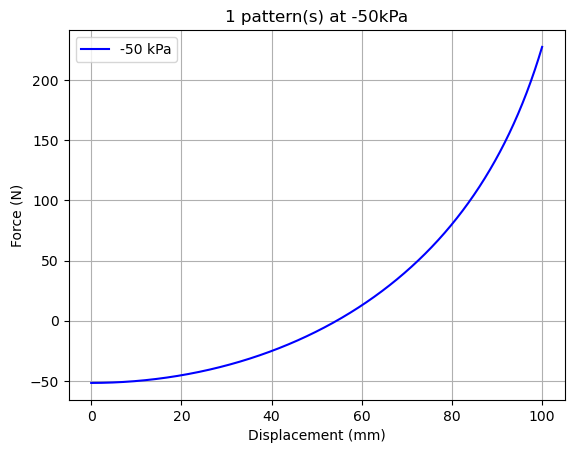

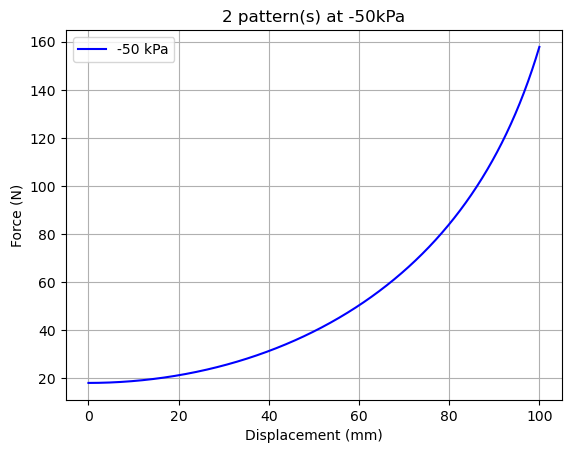

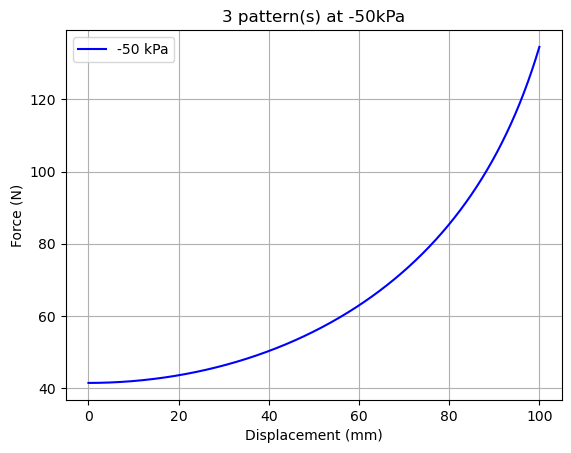

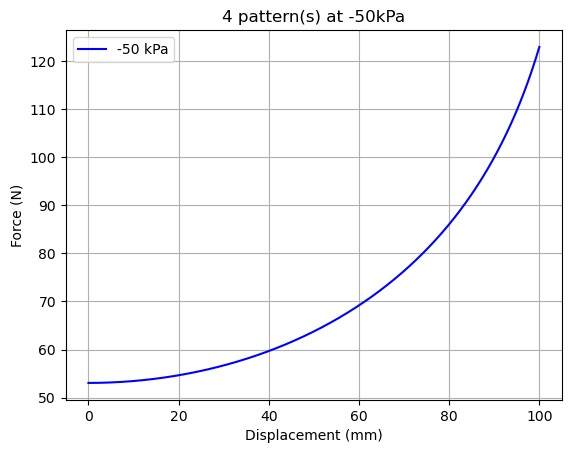

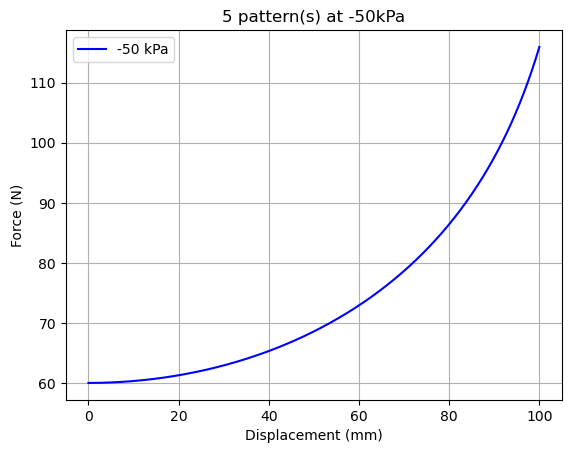

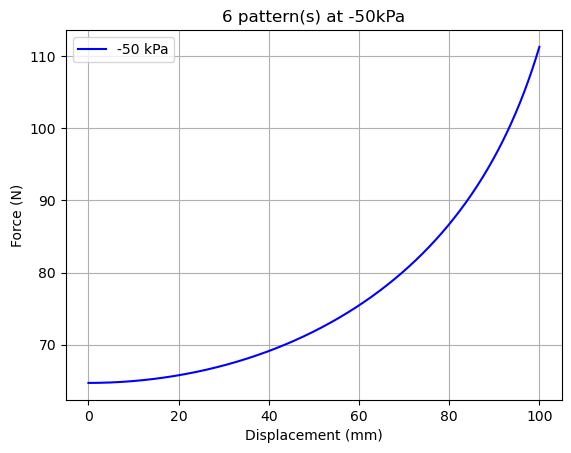

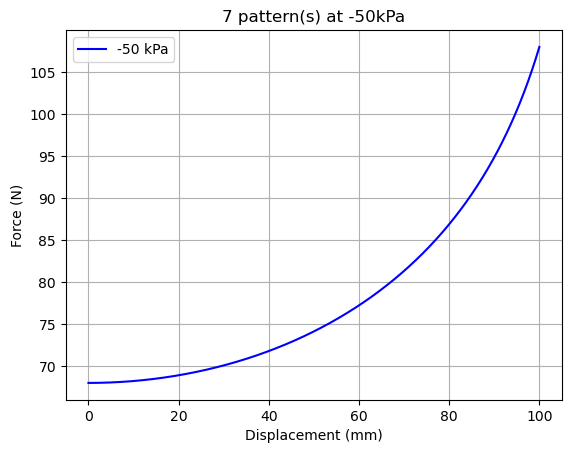

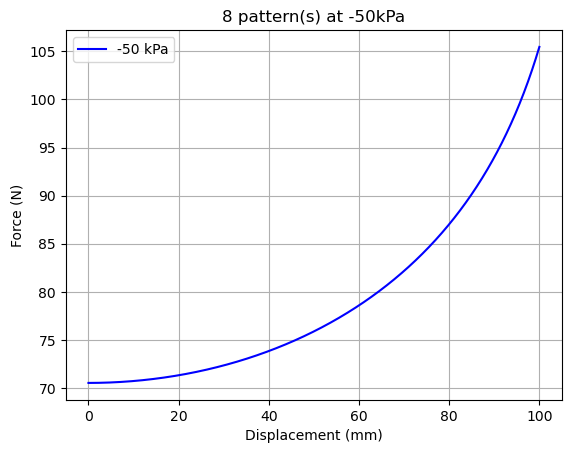

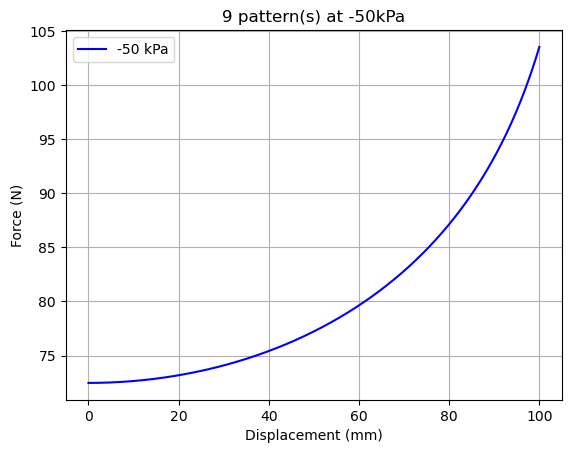

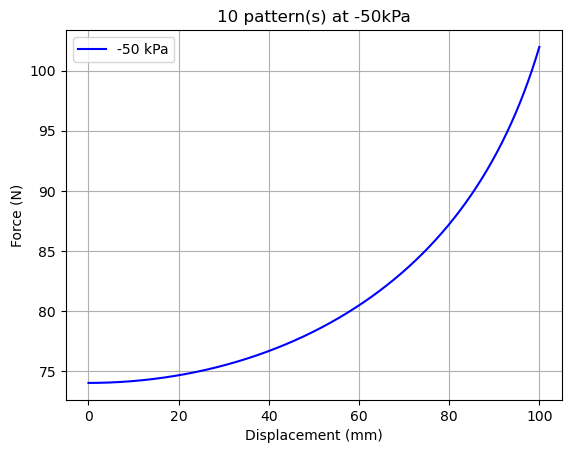

In [148]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

d = 10.2*10**-3
P = -50*10**3
F_MAX = np.zeros(11)
F_MIN = np.zeros(11)
F_DIF = np.zeros(11)

for i in range(1,11):
    
    L0=100/i/np.sin(np.pi/3)*10**-3
    L = L0*np.sin(theta)
    D = 27*10**-3
    L_tot = i*L*1000
    A = 2*(1+2**0.5)*D**2
    dL = L0*np.cos(theta)


    dV = A*0.5*L0*np.cos(theta)-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F = -P*dV/dL
    
    F_MAX[i] = F[np.abs(L_tot - 100).argmin()] 
    F_MIN[i] = F[np.abs(L_tot).argmin()] 
    F_DIF[i] = F_MAX[i] - F_MIN[i]

    plt.plot(L_tot,F,'b-', label='-50 kPa')
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')

    plt.legend()
    plt.grid(True)
    plt.title(str(i) + ' pattern(s) at -50kPa')
    plt.show()

# 패턴 개수에 따른 F_MAX, F_MIN, F_DIFF. 그래프

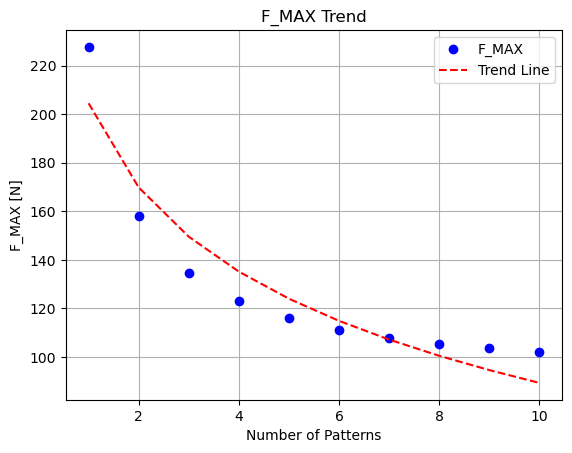

F_MAX Trend Function: a * log(x) + b
a = -50.03663099055745
b = 204.49865894347428



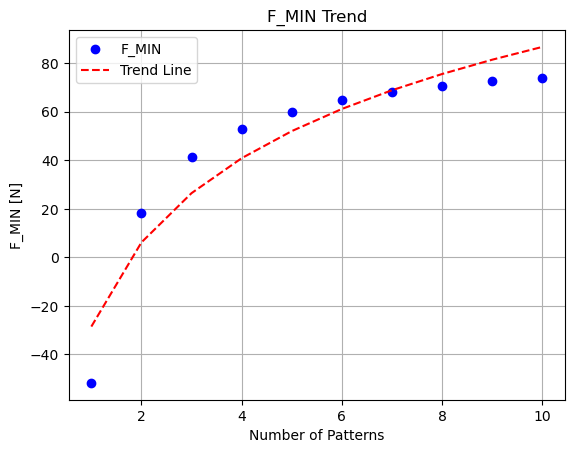

F_MIN Trend Function: a * log(x) + b
a = 50.036631063044226
b = -28.502490347901713



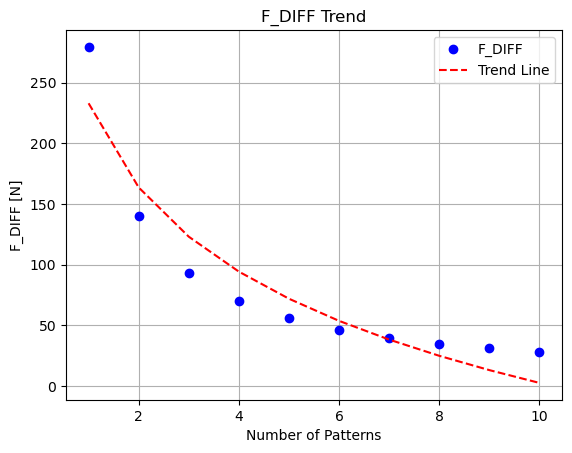

F_DIFF Trend Function: a * log(x) + b
a = -100.07326189708647
b = 233.00114904072285


In [149]:
pattern_count = range(1, 11)

# F_MAX 추세 그래프 (로그 함수)
def log_func_max(x, a, b):
    return a * np.log(x) + b

popt_max, _ = curve_fit(log_func_max, pattern_count, F_MAX[1:])

trend_max = log_func_max(pattern_count, *popt_max)
trend_function_max = log_func_max(pattern_count, *popt_max)

plt.plot(pattern_count, F_MAX[1:], 'bo', label='F_MAX')
plt.plot(pattern_count, trend_function_max, 'r--', label='Trend Line')
plt.xlabel('Number of Patterns')
plt.ylabel('F_MAX [N]')
plt.title('F_MAX Trend')
plt.legend()
plt.grid(True)
plt.show()

print("F_MAX Trend Function: a * log(x) + b")
print(f"a = {popt_max[0]}")
print(f"b = {popt_max[1]}")
print()

# F_MIN 추세 그래프 (로그 함수)
def log_func_min(x, a, b):
    return a * np.log(x) + b

popt_min, _ = curve_fit(log_func_min, pattern_count, F_MIN[1:])

trend_min = log_func_min(pattern_count, *popt_min)
trend_function_min = log_func_min(pattern_count, *popt_min)

plt.plot(pattern_count, F_MIN[1:], 'bo', label='F_MIN')
plt.plot(pattern_count, trend_function_min, 'r--', label='Trend Line')
plt.xlabel('Number of Patterns')
plt.ylabel('F_MIN [N]')
plt.title('F_MIN Trend')
plt.legend()
plt.grid(True)
plt.show()

print("F_MIN Trend Function: a * log(x) + b")
print(f"a = {popt_min[0]}")
print(f"b = {popt_min[1]}")
print()

# F_DIFF 추세 그래프 (로그 함수)
def log_func_diff(x, a, b):
    return a * np.log(x) + b

popt_diff, _ = curve_fit(log_func_diff, pattern_count, F_DIF[1:])

trend_diff = log_func_diff(pattern_count, *popt_diff)
trend_function_diff = log_func_diff(pattern_count, *popt_diff)

plt.plot(pattern_count, F_DIF[1:], 'bo', label='F_DIFF')
plt.plot(pattern_count, trend_function_diff, 'r--', label='Trend Line')
plt.xlabel('Number of Patterns')
plt.ylabel('F_DIFF [N]')
plt.title('F_DIFF Trend')
plt.legend()
plt.grid(True)
plt.show()

print("F_DIFF Trend Function: a * log(x) + b")
print(f"a = {popt_diff[0]}")
print(f"b = {popt_diff[1]}")


# 팔각형 액추에이터-패턴 개수=15개

In [150]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

d = 10.2*10**-3

L0 = 23.094/3*10**-3
L = L0*np.sin(theta)
D = 27*10**-3

n = 15  #몇 층?

L_tot = n*L*1000

In [151]:
P = -40*10**3

A = 2*(1+2**0.5)*D**2

dL = L0*np.cos(theta)

dV = A*0.5*L0*np.cos(theta)-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

F = -P*dV/dL

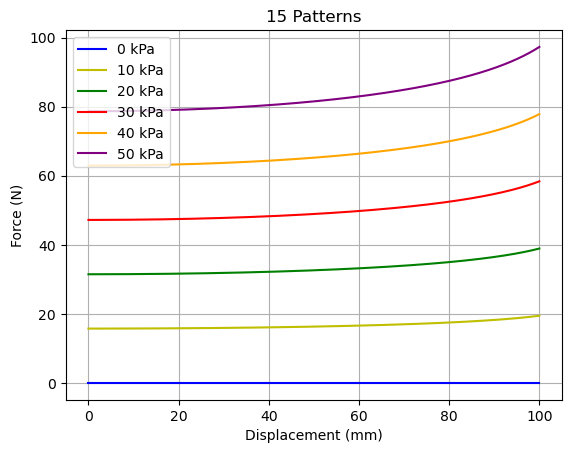

In [152]:
F=[0]*7
for i in range(0,6):
    
    P = -1 * 10* (i)*10**3 # Pa

    A = 2*(1+2**0.5)*D**2

    dL = L0*np.cos(theta)

    dV = A*0.5*L0*np.cos(theta)-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F[i] = -P*dV/dL

   # plt.plot(L_tot,F[i])
    
    F[6] = dV/dL

    
    plt.title('15 Patterns')
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')
    
plt.plot(L_tot,F[0],'b-', label='0 kPa')
plt.plot(L_tot,F[1],'y-', label='10 kPa')
plt.plot(L_tot,F[2],'g-', label='20 kPa')
plt.plot(L_tot,F[3],'r-', label='30 kPa')
plt.plot(L_tot,F[4],'orange', label='40 kPa')
plt.plot(L_tot,F[5],'purple', label='50 kPa')

plt.legend()
plt.grid(True)
plt.show()

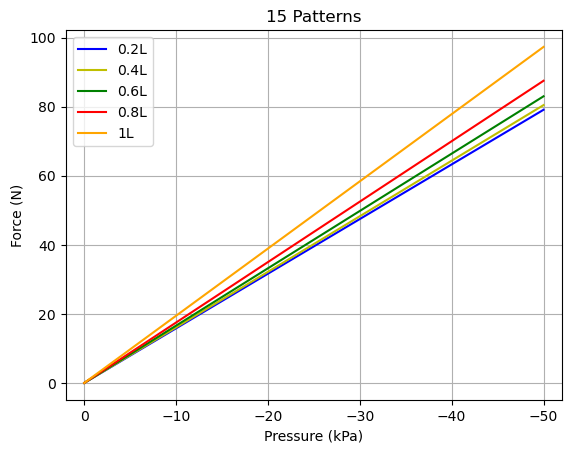

In [153]:
F_P = [0]*5
P_linspace = np.linspace(-50,0,100)  # 0~50 kPa를 쪼개기

a = [0.001582,0.001609,0.001660,0.001750,0.001946]
for i in range(0,5):
    F_P[i] = -P_linspace*a[i]*1000
    
    plt.xlabel('Pressure (kPa)')
    plt.ylabel('Force (N)')
    plt.title('15 Patterns')
    
plt.plot(P_linspace,F_P[0],'b-', label='0.2L')
plt.plot(P_linspace,F_P[1],'y-', label='0.4L')
plt.plot(P_linspace,F_P[2],'g-', label='0.6L')
plt.plot(P_linspace,F_P[3],'r-', label='0.8L')
plt.plot(P_linspace,F_P[4],'orange', label='1L')

plt.xlim([2, -52])

plt.legend()
plt.grid(True)
plt.show()

# 팔각형 액추에이터-패턴 개수=10개

In [154]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

d = 10.2*10**-3

L0 = 23.094/2*10**-3
L = L0*np.sin(theta)
D = 27*10**-3

n = 10  #몇 층?

L_tot = n*L*1000

In [155]:
P = -40*10**3

A = 2*(1+2**0.5)*D**2

dL = L0*np.cos(theta)

dV = A*0.5*L0*np.cos(theta)-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

F = -P*dV/dL

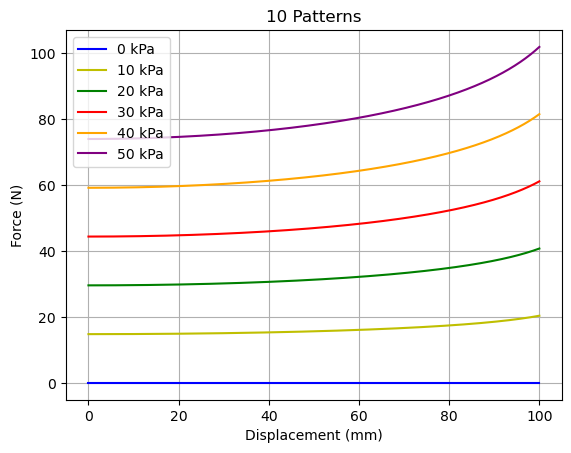

In [156]:
F=[0]*7
for i in range(0,6):
    
    P = -1 * 10* (i)*10**3 # Pa

    A = 2*(1+2**0.5)*D**2

    dL = L0*np.cos(theta)

    dV = A*0.5*L0*np.cos(theta)-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F[i] = -P*dV/dL

   # plt.plot(L_tot,F[i])
    
    F[6] = dV/dL

    
    
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')
    plt.title('10 Patterns')
    
plt.plot(L_tot,F[0],'b-', label='0 kPa')
plt.plot(L_tot,F[1],'y-', label='10 kPa')
plt.plot(L_tot,F[2],'g-', label='20 kPa')
plt.plot(L_tot,F[3],'r-', label='30 kPa')
plt.plot(L_tot,F[4],'orange', label='40 kPa')
plt.plot(L_tot,F[5],'purple', label='50 kPa')

plt.legend()
plt.grid(True)
plt.show()


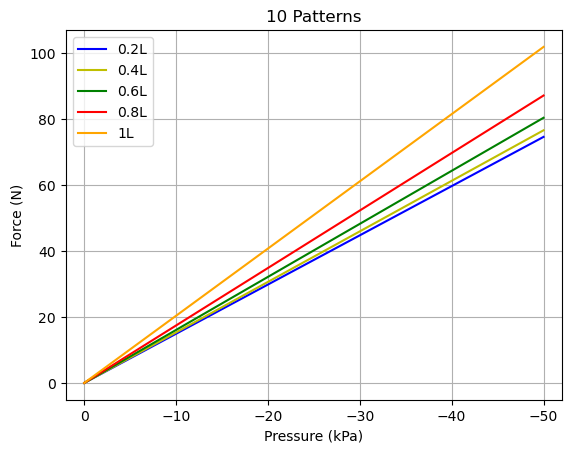

In [157]:
F_P = [0]*5
P_linspace = np.linspace(-50,0,100)  # 0~50 kPa를 쪼개기

a = [0.001493,0.001533,0.001609,0.001744,0.002039]
for i in range(0,5):
    F_P[i] = -P_linspace*a[i]*1000
    
    plt.xlabel('Pressure (kPa)')
    plt.ylabel('Force (N)')
    plt.title('10 Patterns')

    
plt.plot(P_linspace,F_P[0],'b-', label='0.2L')
plt.plot(P_linspace,F_P[1],'y-', label='0.4L')
plt.plot(P_linspace,F_P[2],'g-', label='0.6L')
plt.plot(P_linspace,F_P[3],'r-', label='0.8L')
plt.plot(P_linspace,F_P[4],'orange', label='1L')

plt.xlim([2, -52])

plt.legend()
plt.grid(True)
plt.show()

# 팔각형 액추에이터- 패턴 개수:5개

In [158]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

d = 10.2*10**-3

L0 = 23.094*10**-3
L = L0*np.sin(theta)
D = 27*10**-3

n = 5  #몇 층?

L_tot = n*L*1000

In [159]:
P = -40*10**3

A = 2*(1+2**0.5)*D**2

dL = L0*np.cos(theta)

dV = A*0.5*L0*np.cos(theta)-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

F = -P*dV/dL

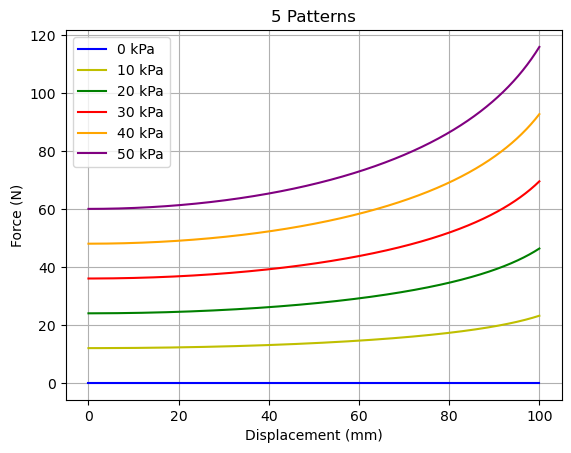

In [160]:
F=[0]*7
for i in range(0,6):
    
    P = -1 * 10* (i)*10**3 # Pa

    A = 2*(1+2**0.5)*D**2

    dL = L0*np.cos(theta)

    dV = A*0.5*L0*np.cos(theta)-1/6*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F[i] = -P*dV/dL

   # plt.plot(L_tot,F[i])
    
    F[6] = dV/dL

    
    plt.title('5 Patterns')
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')
    
plt.plot(L_tot,F[0],'b-', label='0 kPa')
plt.plot(L_tot,F[1],'y-', label='10 kPa')
plt.plot(L_tot,F[2],'g-', label='20 kPa')
plt.plot(L_tot,F[3],'r-', label='30 kPa')
plt.plot(L_tot,F[4],'orange', label='40 kPa')
plt.plot(L_tot,F[5],'purple', label='50 kPa')

plt.legend()
plt.grid(True)
plt.show()

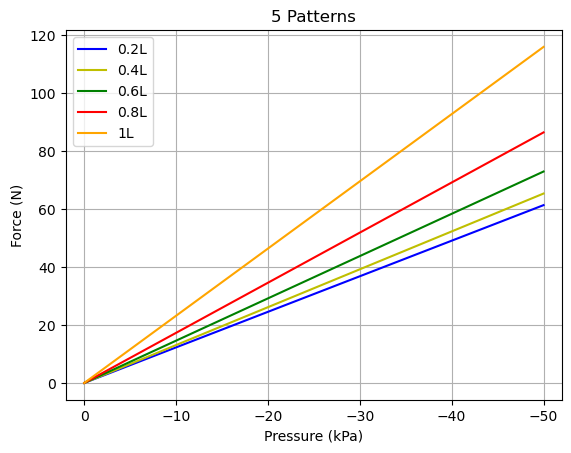

In [161]:
F_P = [0]*5
P_linspace = np.linspace(-50,0,100)  # 0~50 kPa를 쪼개기

a = [0.001227,0.001307,0.001459,0.001729,0.002319]
for i in range(0,5):
    F_P[i] = -P_linspace*a[i]*1000
    
    plt.xlabel('Pressure (kPa)')
    plt.ylabel('Force (N)')
    plt.title('5 Patterns')
    
plt.plot(P_linspace,F_P[0],'b-', label='0.2L')
plt.plot(P_linspace,F_P[1],'y-', label='0.4L')
plt.plot(P_linspace,F_P[2],'g-', label='0.6L')
plt.plot(P_linspace,F_P[3],'r-', label='0.8L')
plt.plot(P_linspace,F_P[4],'orange', label='1L')

plt.xlim([2, -52])

plt.legend()
plt.grid(True)
plt.show()

# 사각형 액추에이터- 패턴 개수:5개

In [162]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

d = 43.2*10**-3

L0 = 23.094*10**-3
L = L0*np.sin(theta)
D = 60*10**-3

n = 5  #몇 층?

L_tot = n*L*1000

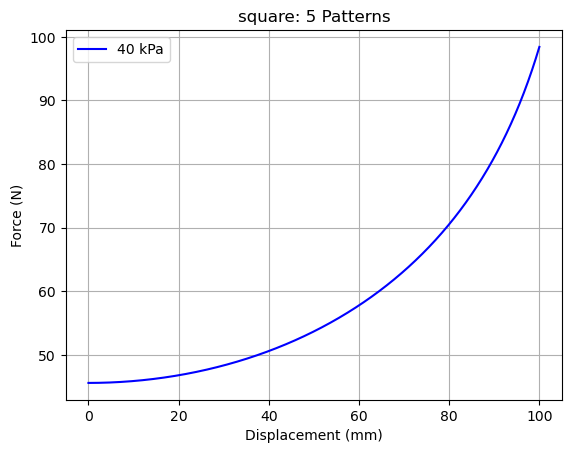

In [163]:
P = -40*10**3

A = D**2

dL = L0*np.cos(theta)

dV = A*0.5*L0*np.cos(theta)-1/12*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

F = -P*dV/dL

plt.plot(L_tot,F,'b-', label='40 kPa')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')
plt.title('square: 5 Patterns')

plt.legend()
plt.grid(True)
plt.show()


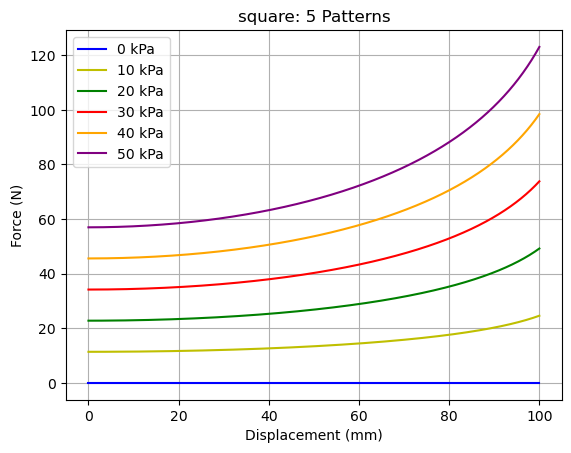

In [164]:
F=[0]*7
for i in range(0,6):
    
    P = -1 * 10* (i)*10**3 # Pa

    A = D**2

    dL = L0*np.cos(theta)

    dV = A*0.5*L0*np.cos(theta)-1/12*L0**2*(5*D+d)*(np.cos(theta)**2-np.sin(theta)**2)

    F[i] = -P*dV/dL

   # plt.plot(L_tot,F[i])
    
    F[6] = dV/dL

    plt.title('square: 5 Patterns')

    
    plt.xlabel('Displacement (mm)')
    plt.ylabel('Force (N)')
    
plt.plot(L_tot,F[0],'b-', label='0 kPa')
plt.plot(L_tot,F[1],'y-', label='10 kPa')
plt.plot(L_tot,F[2],'g-', label='20 kPa')
plt.plot(L_tot,F[3],'r-', label='30 kPa')
plt.plot(L_tot,F[4],'orange', label='40 kPa')
plt.plot(L_tot,F[5],'purple', label='50 kPa')

plt.legend()
plt.grid(True)
plt.show()

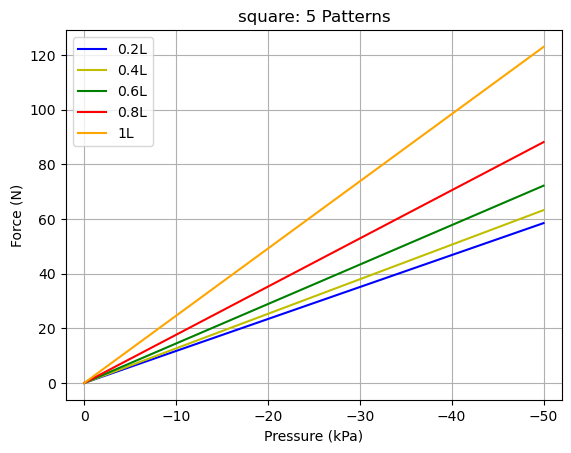

In [165]:
F_P = [0]*5
P_linspace = np.linspace(-50,0,100)  # 0~50 kPa를 쪼개기

a = [0.001170,0.001265,0.001444,0.001763,0.002460]
for i in range(0,5):
    F_P[i] = -P_linspace*a[i]*1000
    
    plt.xlabel('Pressure (kPa)')
    plt.ylabel('Force (N)')
    plt.title('square: 5 Patterns')
    
plt.plot(P_linspace,F_P[0],'b-', label='0.2L')
plt.plot(P_linspace,F_P[1],'y-', label='0.4L')
plt.plot(P_linspace,F_P[2],'g-', label='0.6L')
plt.plot(P_linspace,F_P[3],'r-', label='0.8L')
plt.plot(P_linspace,F_P[4],'orange', label='1L')

plt.xlim([2, -52])

plt.legend()
plt.grid(True)
plt.show()

# 실제 모델 팔각형 액추에이터 : 패턴 5개/ 총 높이 140mm

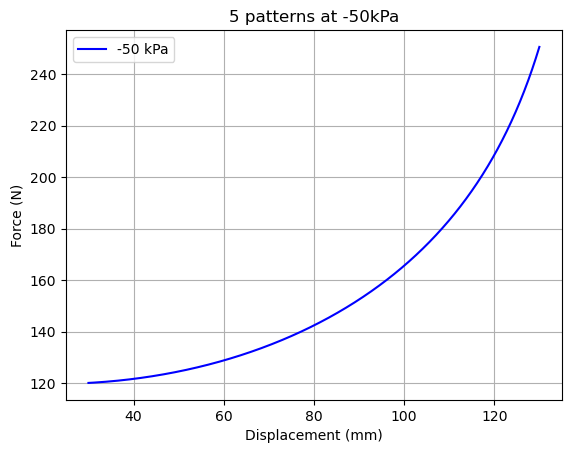

In [184]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

h = 22*10**-3
D = 27*10**-3
t = 2*10**-3
d = 10.218*10**-3
s = 5*10**-3
R = 20*10**-3

n = 5

L0 = (h-t)/np.sin(np.pi/3)+t

# print('L0 =' + ' ' + str(L0)) # L0 검증

L = (L0-t)*np.sin(theta)+t
L_t = (n*L+(n-1)*s)*1000

dL = (L0-t)*np.cos(theta)
dL_t = n*dL

dV = 2*n*(1+2**0.5)*D**2*((L0-t)*np.cos(theta))-2/3*n*(D-d)*(L0-t)**2*(np.cos(theta)**2-np.sin(theta)**2)-n*(D+d)*(L0-t)**2*np.cos(theta)**2+n*(D+d)*((L0-t)*np.sin(theta)+2*t)*(L0-t)*np.sin(theta)+2*n*t*(D-d)*(L0-t)*np.sin(theta)

# V = 2*n*(1+2**0.5)*D**2*((L0-t)*np.sin(theta)+t)-2/3*n*(D-d)*(L0-t)**2*np.cos(theta)*np.sin(theta)-n*(D+d)*((L0-t)*np.sin(theta)+2*t)*(L0-t)*np.cos(theta)-2*n*t*(D-d)*(L0-t)*np.cos(theta)
# index = np.where(theta == np.pi/3)[0][0] #내부 부피 검증
# print('V at theta = pi/3:', V[index]) #내부 부피 검증

F = -P*dV/dL_t

P = -50*1000

plt.plot(L_t,F,'b-', label='-50 kPa')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')

plt.legend()
plt.grid(True)
plt.title(str(n)+' patterns at -50kPa')
plt.show()

# 실제 모델 팔각형 액추에이터 : 패턴 10개/ 총 높이 140mm

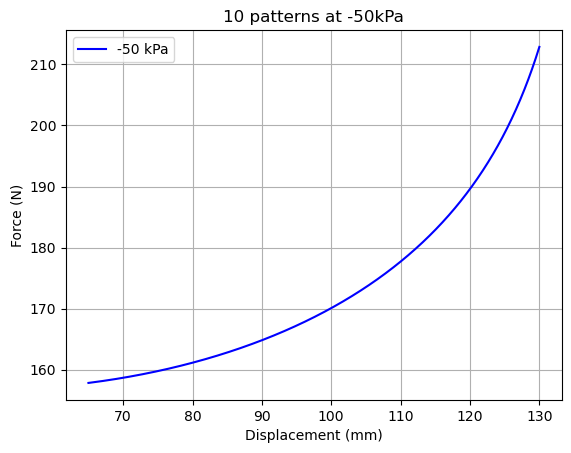

In [185]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

h = 8.5*10**-3
D = 27*10**-3
t = 2*10**-3
d = 10.218*10**-3
s = 5*10**-3
R = 20*10**-3

n = 10

L0 = (h-t)/np.sin(np.pi/3)+t

# print('L0 =' + ' ' + str(L0)) # L0 검증

L = (L0-t)*np.sin(theta)+t
L_t = (n*L+(n-1)*s)*1000

dL = (L0-t)*np.cos(theta)
dL_t = n*dL

dV = 2*n*(1+2**0.5)*D**2*((L0-t)*np.cos(theta))-2/3*n*(D-d)*(L0-t)**2*(np.cos(theta)**2-np.sin(theta)**2)-n*(D+d)*(L0-t)**2*np.cos(theta)**2+n*(D+d)*((L0-t)*np.sin(theta)+2*t)*(L0-t)*np.sin(theta)+2*n*t*(D-d)*(L0-t)*np.sin(theta)

# V = 2*n*(1+2**0.5)*D**2*((L0-t)*np.sin(theta)+t)-2/3*n*(D-d)*(L0-t)**2*np.cos(theta)*np.sin(theta)-n*(D+d)*((L0-t)*np.sin(theta)+2*t)*(L0-t)*np.cos(theta)-2*n*t*(D-d)*(L0-t)*np.cos(theta)
# index = np.where(theta == np.pi/3)[0][0] #내부 부피 검증
# print('V at theta = pi/3:', V[index]) #내부 부피 검증

F = -P*dV/dL_t

P = -50*1000

plt.plot(L_t,F,'b-', label='-50 kPa')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')

plt.legend()
plt.grid(True)
plt.title(str(n)+' patterns at -50kPa')
plt.show()

# 사각형 액추에이터 실제 모델: 패턴 10개/ 총 높이 140mm

In [ ]:
theta = np.linspace(np.pi/180*60,0,1000) # rad

h = 22*10**-3
D = 27*10**-3
t = 2*10**-3
d = 10.218*10**-3
s = 5*10**-3
R = 20*10**-3

n = 5

L0 = (h-t)/np.sin(np.pi/3)+t

# print('L0 =' + ' ' + str(L0)) # L0 검증

L = (L0-t)*np.sin(theta)+t
L_t = (n*L+(n-1)*s)*1000

dL = (L0-t)*np.cos(theta)
dL_t = n*dL

dV = 2*n*(1+2**0.5)*D**2*((L0-t)*np.cos(theta))-2/3*n*(D-d)*(L0-t)**2*(np.cos(theta)**2-np.sin(theta)**2)-n*(D+d)*(L0-t)**2*np.cos(theta)**2+n*(D+d)*((L0-t)*np.sin(theta)+2*t)*(L0-t)*np.sin(theta)+2*n*t*(D-d)*(L0-t)*np.sin(theta)

# V = 2*n*(1+2**0.5)*D**2*((L0-t)*np.sin(theta)+t)-2/3*n*(D-d)*(L0-t)**2*np.cos(theta)*np.sin(theta)-n*(D+d)*((L0-t)*np.sin(theta)+2*t)*(L0-t)*np.cos(theta)-2*n*t*(D-d)*(L0-t)*np.cos(theta)
# index = np.where(theta == np.pi/3)[0][0] #내부 부피 검증
# print('V at theta = pi/3:', V[index]) #내부 부피 검증

F = -P*dV/dL_t

P = -50*1000

plt.plot(L_t,F,'b-', label='-50 kPa')
plt.xlabel('Displacement (mm)')
plt.ylabel('Force (N)')

plt.legend()
plt.grid(True)
plt.title(str(n)+' patterns at -50kPa')
plt.show()